In [2]:
import numpy as np
import pandas as pd
#from google.colab import files
#uploaded = files.upload()


In [7]:
import io
from tqdm import tqdm
import matplotlib.pyplot as plt

a_data = pd.read_csv("5_a.csv")
def confusion(data):
    class_label=[]
   
    for index,row in data.iterrows(): #iterating dataframe
        
       
        if(row["proba"]<0.5):
            class_label.append(0)
        else: 
            class_label.append(1)
    data["class_label"]=class_label
    tp=0
    fp=0
    tn=0
    fn=0
    for index,row in data.iterrows():
        if(row["y"]==1 and row["class_label"]==1):
             tp+=1
        elif(row["y"]==1 and row["class_label"]==0):
             fn+=1
        elif(row["y"]==0 and row["class_label"]==1):
             fp+=1
        else:
             tn+=1
    l1=[]
    l2=[]
    l1.extend([tp,fp])
    l2.extend([fn,tn])
    l3=[]
    l3.extend([l1,l2]) #confusion matrix
    print("confusion matrix :",l3)
    pre=tp/(tp+fp)
    rec=tp/(tp+fn)
    f1_score=2*pre*rec/(pre+rec) #f_1 score
    print("f1 score :",f1_score*100)
    acc_score=(tn+tp)/len(data)
    print("accuracy_score :",acc_score*100)

    pro=data["proba"].tolist()
    prob=list(set(pro))
    tpr=[]
    prob.sort()
    fpr=[]
    y_pred=[]
    for i in tqdm(prob):
        y_pred=[]
        tpr_rate=0
        fpr_rate=0
        TP=0
        FP=0
        TN=0
        FN=0
        for index, row in data.iterrows():
            if(row["proba"]<i):
                y_pred.append(0)
            else:
                y_pred.append(1)
        data["y_pre"]=y_pred
        for index,row in data.iterrows():
            if(row["y"]==1 and row["y_pre"]==1):
                TP+=1
     
            if(row["y"]==0and row["y_pre"]==1):
                FP+=1
            if(row["y"]==0 and row["y_pre"]==0):
                TN+=1
            else:
                FN+=1
        tpr_rate=TP/(TP+FP)
        fpr_rate=FP/(FP+TN)
        tpr.append(tpr_rate)
        fpr.append(fpr_rate)
       
    plt.plot(fpr, tpr) 
  
    plt.xlabel('fpr') 
    plt.ylabel('tpr') 
    plt.title('tpr vs fpr')
    TPR = np.array(tpr) 
    FPR = np.array(fpr) 
    auc=np.trapz(TPR,FPR)
    print('auc score :')
    print(-auc)
    return 



  0%|                                                                                        | 0/10100 [00:00<?, ?it/s]

confusion matrix : [[55, 239], [45, 9761]]
f1 score : 27.91878172588833
accuracy_score : 97.18811881188118



  1%|▌                                                                            | 66/10100 [02:32<4:01:46,  1.45s/it]


  1%|▉                                                                           | 132/10100 [04:06<3:52:25,  1.40s/it]


  2%|█▍                                                                          | 198/10100 [05:37<3:45:32,  1.37s/it]


  3%|█▉                                                                          | 264/10100 [07:08<3:40:40,  1.35s/it]


  3%|██▍                                                                         | 330/10100 [08:38<3:39:19,  1.35s/it]


  4%|██▉                                                                         | 396/10100 [10:09<3:52:12,  1.44s/it]


  5%|███▍                                                                        | 462/10100 [11:41<3:40:06,  1.37s/it]


  5%|███▉                                                                        | 528/10100 [13:10<3:38:51,  1.37s/it]


  6%|████▍                                                                       | 594/10100 [14:42<3:44:31,  1.42s/it]


  7%|████▉                                                                       | 660/10100 [16:14<3:37:21,  1.38s/it]


  7%|█████▍                                                                      | 726/10100 [17:44<3:32:48,  1.36s/it]


  8%|█████▊                                                                    | 792/10100 [1:59:12<6:03:59,  2.35s/it]


  8%|██████▎                                                                   | 858/10100 [2:01:49<6:05:38,  2.37s/it]


  9%|██████▊                                                                   | 924/10100 [2:04:29<6:13:02,  2.44s/it]


 10%|███████▎                                                                  | 990/10100 [2:07:13<7:41:27,  3.04s/it]


 10%|███████▋                                                                 | 1056/10100 [2:09:59<6:09:20,  2.45s/it]


 11%|████████                                                                 | 1122/10100 [2:12:47<6:26:17,  2.58s/it]


 12%|████████▌                                                                | 1188/10100 [2:15:32<6:05:01,  2.46s/it]


 12%|█████████                                                                | 1254/10100 [2:18:18<6:24:52,  2.61s/it]


 13%|█████████▌                                                               | 1320/10100 [2:21:17<6:25:41,  2.64s/it]


 14%|██████████                                                               | 1386/10100 [2:24:12<6:17:53,  2.60s/it]


 14%|██████████▍                                                              | 1452/10100 [2:27:00<6:09:04,  2.56s/it]


 15%|██████████▉                                                              | 1518/10100 [2:29:50<6:08:55,  2.58s/it]


 16%|███████████▍                                                             | 1584/10100 [2:32:31<5:39:15,  2.39s/it]


 16%|███████████▉                                                             | 1650/10100 [2:35:10<5:37:39,  2.40s/it]


 17%|████████████▍                                                            | 1716/10100 [2:37:49<5:35:50,  2.40s/it]


 18%|████████████▉                                                            | 1782/10100 [2:40:29<5:38:26,  2.44s/it]


 18%|█████████████▎                                                           | 1848/10100 [3:41:55<3:09:11,  1.38s/it]


 19%|█████████████▊                                                           | 1914/10100 [3:43:27<3:10:00,  1.39s/it]


 20%|██████████████▎                                                          | 1980/10100 [3:44:58<3:03:46,  1.36s/it]


 20%|██████████████▊                                                          | 2046/10100 [3:46:27<2:58:20,  1.33s/it]


 21%|███████████████▎                                                         | 2112/10100 [3:47:56<2:59:55,  1.35s/it]


 22%|███████████████▋                                                         | 2178/10100 [3:49:31<3:06:54,  1.42s/it]


 22%|████████████████▏                                                        | 2244/10100 [3:51:03<2:59:32,  1.37s/it]


 23%|████████████████▋                                                        | 2310/10100 [3:52:33<2:53:43,  1.34s/it]


 24%|█████████████████▏                                                       | 2376/10100 [3:54:02<2:54:48,  1.36s/it]


 24%|█████████████████▋                                                       | 2442/10100 [4:30:40<3:13:58,  1.52s/it]


 25%|██████████████████▏                                                      | 2508/10100 [4:32:09<2:57:08,  1.40s/it]


 25%|██████████████████▌                                                      | 2574/10100 [4:33:44<2:56:02,  1.40s/it]


 26%|███████████████████                                                      | 2640/10100 [4:35:14<2:52:07,  1.38s/it]


 27%|███████████████████▌                                                     | 2706/10100 [4:36:43<2:48:41,  1.37s/it]


 27%|████████████████████                                                     | 2772/10100 [4:38:14<2:44:40,  1.35s/it]


 28%|████████████████████▌                                                    | 2838/10100 [4:39:49<2:53:17,  1.43s/it]


 29%|████████████████████▉                                                    | 2904/10100 [4:41:20<2:43:42,  1.36s/it]


 29%|█████████████████████▍                                                   | 2970/10100 [4:42:51<2:40:25,  1.35s/it]


 30%|█████████████████████▋                                                  | 3036/10100 [5:28:06<24:04:32, 12.27s/it]


 31%|██████████████████████▍                                                  | 3102/10100 [5:29:35<2:34:43,  1.33s/it]


 31%|██████████████████████▉                                                  | 3168/10100 [5:31:05<2:35:03,  1.34s/it]


 32%|███████████████████████▎                                                 | 3234/10100 [5:32:35<2:37:15,  1.37s/it]


 33%|███████████████████████▊                                                 | 3300/10100 [5:34:07<2:31:20,  1.34s/it]


 33%|████████████████████████▎                                                | 3366/10100 [5:35:38<2:36:13,  1.39s/it]


 34%|████████████████████████▊                                                | 3432/10100 [5:37:07<2:34:24,  1.39s/it]


 35%|████████████████████████▉                                               | 3498/10100 [6:23:22<11:55:34,  6.50s/it]


 35%|█████████████████████████▊                                               | 3564/10100 [6:26:10<4:34:15,  2.52s/it]


 36%|██████████████████████████▏                                              | 3630/10100 [6:28:52<4:27:59,  2.49s/it]


 37%|██████████████████████████▋                                              | 3696/10100 [6:31:36<4:27:47,  2.51s/it]


 37%|███████████████████████████▏                                             | 3762/10100 [6:34:22<4:19:13,  2.45s/it]


 38%|███████████████████████████▋                                             | 3828/10100 [6:37:10<4:21:19,  2.50s/it]


 39%|██████████████████████████▉                                           | 3894/10100 [7:38:47<219:55:09, 127.57s/it]


 39%|████████████████████████████▌                                            | 3960/10100 [7:41:31<4:06:35,  2.41s/it]


 40%|█████████████████████████████                                            | 4026/10100 [7:44:15<4:12:57,  2.50s/it]


 41%|█████████████████████████████▌                                           | 4092/10100 [7:46:55<4:01:57,  2.42s/it]


 41%|██████████████████████████████                                           | 4158/10100 [7:49:35<4:01:35,  2.44s/it]


 42%|██████████████████████████████▌                                          | 4224/10100 [7:52:17<4:06:29,  2.52s/it]


 42%|███████████████████████████████                                          | 4290/10100 [7:55:00<3:59:27,  2.47s/it]


 43%|███████████████████████████████▍                                         | 4356/10100 [7:57:41<3:58:28,  2.49s/it]


 44%|███████████████████████████████▉                                         | 4422/10100 [7:59:55<2:13:15,  1.41s/it]


 44%|████████████████████████████████▍                                        | 4488/10100 [8:01:31<2:27:01,  1.57s/it]


 45%|████████████████████████████████▉                                        | 4554/10100 [8:03:10<2:16:23,  1.48s/it]


 46%|█████████████████████████████████▍                                       | 4620/10100 [8:04:44<2:13:25,  1.46s/it]


 46%|█████████████████████████████████▊                                       | 4686/10100 [8:06:26<2:18:45,  1.54s/it]


 47%|██████████████████████████████████▎                                      | 4752/10100 [8:08:00<2:03:14,  1.38s/it]


 48%|██████████████████████████████████▊                                      | 4818/10100 [8:09:34<2:09:48,  1.47s/it]


 48%|███████████████████████████████████▎                                     | 4884/10100 [8:11:10<2:07:44,  1.47s/it]


 49%|███████████████████████████████████▊                                     | 4950/10100 [8:12:47<2:13:35,  1.56s/it]


 50%|████████████████████████████████████▎                                    | 5016/10100 [8:14:28<2:04:05,  1.46s/it]


 50%|████████████████████████████████████▋                                    | 5082/10100 [8:16:09<2:03:20,  1.47s/it]


 51%|█████████████████████████████████████▏                                   | 5148/10100 [8:17:51<2:28:23,  1.80s/it]


 52%|█████████████████████████████████████▋                                   | 5214/10100 [8:19:31<1:58:47,  1.46s/it]


 52%|██████████████████████████████████████▏                                  | 5280/10100 [8:21:07<1:59:13,  1.48s/it]


 53%|██████████████████████████████████████▋                                  | 5346/10100 [8:22:45<2:05:28,  1.58s/it]


 54%|███████████████████████████████████████                                  | 5412/10100 [8:24:19<1:53:20,  1.45s/it]


 54%|███████████████████████████████████████▌                                 | 5478/10100 [8:25:56<1:52:10,  1.46s/it]


 55%|███████████████████████████████████████▌                                | 5544/10100 [8:31:55<10:10:13,  8.04s/it]


 56%|████████████████████████████████████████▌                                | 5610/10100 [8:33:31<1:46:53,  1.43s/it]


 56%|█████████████████████████████████████████                                | 5676/10100 [8:35:17<1:54:59,  1.56s/it]


 57%|█████████████████████████████████████████▌                               | 5742/10100 [8:37:03<1:48:48,  1.50s/it]


 58%|█████████████████████████████████████████▉                               | 5808/10100 [8:38:43<2:01:24,  1.70s/it]


 58%|██████████████████████████████████████████▍                              | 5874/10100 [8:40:27<2:08:46,  1.83s/it]


 59%|██████████████████████████████████████████▉                              | 5940/10100 [8:42:02<1:39:36,  1.44s/it]


 59%|███████████████████████████████████████████▍                             | 6006/10100 [8:43:35<1:36:21,  1.41s/it]


 60%|███████████████████████████████████████████▉                             | 6072/10100 [8:45:09<1:32:50,  1.38s/it]


 61%|████████████████████████████████████████████▎                            | 6138/10100 [8:46:45<2:37:11,  2.38s/it]


 61%|████████████████████████████████████████████▊                            | 6204/10100 [8:49:32<2:42:26,  2.50s/it]


 62%|█████████████████████████████████████████████▎                           | 6270/10100 [8:52:17<2:37:44,  2.47s/it]


 63%|█████████████████████████████████████████████▊                           | 6336/10100 [8:55:02<2:33:52,  2.45s/it]


 63%|██████████████████████████████████████████████▎                          | 6402/10100 [8:57:46<2:32:59,  2.48s/it]


 64%|██████████████████████████████████████████████▋                          | 6468/10100 [9:00:32<2:32:36,  2.52s/it]


 65%|███████████████████████████████████████████████▏                         | 6534/10100 [9:03:19<2:36:01,  2.63s/it]


 65%|███████████████████████████████████████████████▋                         | 6600/10100 [9:06:05<2:29:01,  2.55s/it]


 66%|████████████████████████████████████████████████▏                        | 6666/10100 [9:08:52<2:24:34,  2.53s/it]


 67%|████████████████████████████████████████████████▋                        | 6732/10100 [9:11:37<2:21:03,  2.51s/it]


 67%|█████████████████████████████████████████████████▏                       | 6798/10100 [9:14:24<2:18:47,  2.52s/it]


 68%|█████████████████████████████████████████████████▌                       | 6864/10100 [9:17:09<2:17:51,  2.56s/it]


 69%|██████████████████████████████████████████████████                       | 6930/10100 [9:19:55<2:12:35,  2.51s/it]


 69%|██████████████████████████████████████████████████▌                      | 6996/10100 [9:22:40<2:09:07,  2.50s/it]


 70%|███████████████████████████████████████████████████                      | 7062/10100 [9:25:25<2:07:15,  2.51s/it]


 71%|███████████████████████████████████████████████████▌                     | 7128/10100 [9:28:10<2:07:28,  2.57s/it]


 71%|███████████████████████████████████████████████████▉                     | 7194/10100 [9:30:55<2:01:23,  2.51s/it]


 72%|████████████████████████████████████████████████████▍                    | 7260/10100 [9:33:41<1:58:37,  2.51s/it]


 73%|████████████████████████████████████████████████████▉                    | 7326/10100 [9:36:26<1:54:54,  2.49s/it]


 73%|█████████████████████████████████████████████████████▍                   | 7392/10100 [9:39:11<1:53:54,  2.52s/it]


 74%|█████████████████████████████████████████████████████▉                   | 7458/10100 [9:41:57<1:49:57,  2.50s/it]


 74%|██████████████████████████████████████████████████████▍                  | 7524/10100 [9:44:43<1:48:18,  2.52s/it]


 75%|██████████████████████████████████████████████████████▊                  | 7590/10100 [9:47:29<1:49:47,  2.62s/it]


 76%|███████████████████████████████████████████████████████▎                 | 7656/10100 [9:50:16<1:42:19,  2.51s/it]


 76%|███████████████████████████████████████████████████████▊                 | 7722/10100 [9:53:01<1:38:36,  2.49s/it]


 77%|████████████████████████████████████████████████████████▎                | 7788/10100 [9:55:48<1:36:09,  2.50s/it]


 78%|████████████████████████████████████████████████████████▊                | 7854/10100 [9:58:33<1:33:35,  2.50s/it]


 78%|████████████████████████████████████████████████████████▍               | 7920/10100 [10:01:19<1:32:28,  2.55s/it]


 79%|████████████████████████████████████████████████████████▉               | 7986/10100 [10:04:06<1:27:31,  2.48s/it]


 80%|█████████████████████████████████████████████████████████▍              | 8052/10100 [10:06:51<1:24:37,  2.48s/it]


 80%|█████████████████████████████████████████████████████████▊              | 8118/10100 [10:09:36<1:24:01,  2.54s/it]


 81%|██████████████████████████████████████████████████████████▎             | 8184/10100 [10:12:25<1:24:13,  2.64s/it]


 82%|██████████████████████████████████████████████████████████▊             | 8250/10100 [10:15:20<1:21:24,  2.64s/it]


 82%|███████████████████████████████████████████████████████████▎            | 8316/10100 [10:18:13<1:19:20,  2.67s/it]


 83%|███████████████████████████████████████████████████████████▊            | 8382/10100 [10:21:08<1:15:20,  2.63s/it]


 84%|████████████████████████████████████████████████████████████▏           | 8448/10100 [10:44:14<8:02:03, 17.51s/it]


 84%|████████████████████████████████████████████████████████████▋           | 8514/10100 [10:47:07<1:14:11,  2.81s/it]


 85%|█████████████████████████████████████████████████████████████▏          | 8580/10100 [10:50:01<1:04:43,  2.56s/it]


 86%|█████████████████████████████████████████████████████████████▋          | 8646/10100 [10:52:52<1:04:10,  2.65s/it]


 86%|███████████████████████████████████████████████████████████████▊          | 8712/10100 [10:55:39<56:06,  2.43s/it]


 87%|████████████████████████████████████████████████████████████████▎         | 8778/10100 [10:58:20<53:45,  2.44s/it]


 88%|████████████████████████████████████████████████████████████████▊         | 8844/10100 [11:01:01<52:42,  2.52s/it]


 88%|█████████████████████████████████████████████████████████████████▎        | 8910/10100 [11:03:41<47:49,  2.41s/it]


 89%|█████████████████████████████████████████████████████████████████▊        | 8976/10100 [11:06:21<44:35,  2.38s/it]


 90%|██████████████████████████████████████████████████████████████████▏       | 9042/10100 [11:09:00<42:12,  2.39s/it]


 90%|██████████████████████████████████████████████████████████████████▋       | 9108/10100 [11:11:40<39:10,  2.37s/it]


 91%|███████████████████████████████████████████████████████████████████▏      | 9174/10100 [11:14:20<36:56,  2.39s/it]


 91%|███████████████████████████████████████████████████████████████████▋      | 9240/10100 [11:16:58<34:11,  2.39s/it]


 92%|████████████████████████████████████████████████████████████████████▏     | 9306/10100 [11:19:23<21:19,  1.61s/it]


 93%|████████████████████████████████████████████████████████████████████▋     | 9372/10100 [11:20:57<16:53,  1.39s/it]


 93%|█████████████████████████████████████████████████████████████████████▏    | 9438/10100 [11:22:30<15:10,  1.38s/it]


 94%|█████████████████████████████████████████████████████████████████████▋    | 9504/10100 [11:24:03<14:08,  1.42s/it]


 95%|██████████████████████████████████████████████████████████████████████    | 9570/10100 [11:25:40<14:04,  1.59s/it]


 95%|██████████████████████████████████████████████████████████████████████▌   | 9636/10100 [11:27:23<12:01,  1.55s/it]


 96%|███████████████████████████████████████████████████████████████████████   | 9702/10100 [11:29:01<09:07,  1.38s/it]


 97%|███████████████████████████████████████████████████████████████████████▌  | 9768/10100 [11:30:34<07:46,  1.40s/it]


 97%|████████████████████████████████████████████████████████████████████████  | 9834/10100 [11:32:06<06:11,  1.40s/it]


 98%|████████████████████████████████████████████████████████████████████████▌ | 9900/10100 [11:33:39<04:37,  1.39s/it]


 99%|█████████████████████████████████████████████████████████████████████████ | 9966/10100 [11:35:12<03:11,  1.43s/it]


 99%|████████████████████████████████████████████████████████████████████████▌| 10032/10100 [11:36:45<01:37,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████▉| 10098/10100 [11:38:19<00:02,  1.39s/it]


100%|█████████████████████████████████████████████████████████████████████████| 10100/10100 [11:38:22<00:00,  4.15s/it]


auc score :
0.037593324707952944


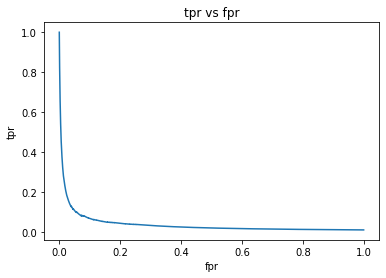

In [8]:
b_data = pd.read_csv("5_b.csv")
confusion(b_data)

In [7]:
up = files.upload()

def threshold_c(data):;jh 
    pro=data["prob"].tolist()
    prob=list(set(pro))
    tpr=[]
    prob.sort()
    fpr=[]
    y_pred=[]
    A_list=[]
    for i in tqdm(prob):
        y_pred=[]

        TP=0
        FP=0
        FN=0
        A=0
        for index, row in data.iterrows():
            if(row["prob"]<i):
                y_pred.append(0)
            else:
                y_pred.append(1)
        data["y_pre"]=y_pred
        for index,row in data.iterrows():
            if(row["y"]==1 and row["y_pre"]==1):
                TP+=1
     
            if(row["y"]==0and row["y_pre"]==1):
                FP+=1
            if(row["y"]==1 and row["y_pre"]==0):
                FN+=1
        A=(500*FN) + (100*FP)
        A_list.append(A)

    lowest_a=min(A_list)
    index_of_lowest_value=A_list.index(lowest_a)
    print("threshold pro  :",prob[index_of_lowest_value])
    return

data = pd.read_csv(io.BytesIO(up["5_c.csv"]))
threshold_c(data)


Saving 5_c.csv to 5_c.csv


100%|██████████| 2791/2791 [22:57<00:00,  2.03it/s]

threshold pro  : 0.2300390278970873


In [8]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["5_d.csv"]))
y_true=data["y"].tolist()
pred=data["pred"].tolist()
a=0
b=0
c=0
v=0
y=0
z=0
x=np.mean(y_true)
for i in range(len(y_true)):
    a+=np.square(y_true[i]-pred[i])/len(y_true)  #mse
    b+=(np.abs(pred[i]-y_true[i]))/(x*len(y_true))  
    y+=np.square(np.subtract(y_true[i],pred[i])) #wiki
    z+=np.square(np.subtract(y_true[i],x))#wiki
v=1-y/z
print("mean squared error :",a)
print("mave error :",b)
print("r2 error :",v)

Saving 5_d.csv to 5_d.csv
mean squared error : 177.16569974564558
mave error : 0.12912029940093667
r2 error : 0.9563582786990964
